# Classification Accuracy
A quick way to evaluate a set of predictions on a classification problem is by using accuracy. It is a percentage ratio of the number of correct predictions out of all predictions.

accuracy =(correct predictions/ total predictions) × 100


In [52]:
# Calculate accuracy percentage between two lists
def accuracy_metric(actual, predicted):
  correct = 0
  for i in range(len(actual)):
    if actual[i] == predicted[i]:
      correct += 1
  accuracy=correct / float(len(actual)) * 100.0
  return accuracy

# Test accuracy
actual = [0,0,0,0,0,1,1,1,1,1]
predicted = [0,1,0,0,0,1,0,1,1,1]
accuracy = accuracy_metric(actual, predicted)
print(accuracy)

80.0


# Confusion Matrix
A confusion matrix provides a summary of all of the predictions made compared to the expected actual values. The results are presented in a matrix with counts in each cell. The counts of predicted class values are summarized horizontally (rows), whereas the counts of actual values for each class values are presented vertically (columns). 

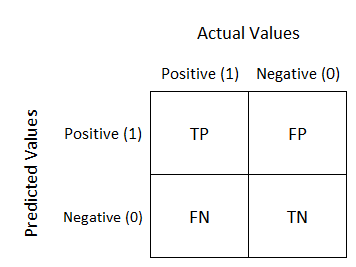

In [53]:
# calculate a confusion matrix
def confusion_matrix(actual, predicted):
  unique = set(actual)
  matrix = [list() for x in range(len(unique))]

  for i in range(len(unique)):
    matrix[i] = [0 for x in range(len(unique))]
    lookup = dict()
    for i, value in enumerate(unique):
      lookup[value] = i

  for i in range(len(actual)):
    x = lookup[actual[i]]
    y = lookup[predicted[i]]
    matrix[y][x] += 1
  return unique, matrix

# pretty print a confusion matrix
def print_confusion_matrix(unique, matrix):
  print('(A)' + ' '.join(str(x) for x in unique))
  print('(P)---')
  for i, x in enumerate(unique):
    print("%s| %s" % (x, ' '.join(str(x) for x in matrix[i])))


  # Test confusion matrix with integers
actual = [0,0,0,0,0,1,1,1,1,1]
predicted = [0,1,1,0,0,1,0,1,1,1]
unique, matrix = confusion_matrix(actual, predicted)
print(unique)
print(matrix)
print()
print_confusion_matrix(unique, matrix)

{0, 1}
[[3, 1], [2, 4]]

(A)0 1
(P)---
0| 3 1
1| 2 4


#Mean Absolute Error
MAE is calculated as the average of the absolute error values. The absolute values can be added together to obtain their mean.

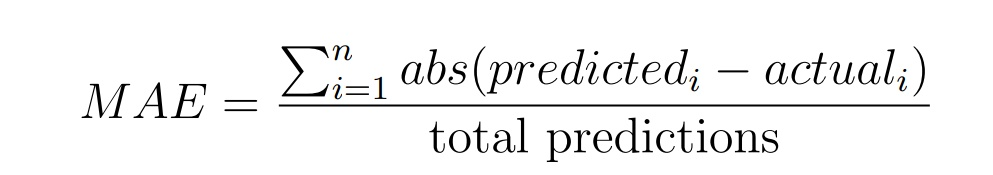

In [54]:
# Calculate mean absolute error
def mae_metric(actual, predicted):
  sum_error = 0.0
  for i in range(len(actual)):
    sum_error += abs(predicted[i] - actual[i])
  mae= sum_error / float(len(actual))
  return mae

# Test
actual = [0.1, 0.2, 0.3, 0.4, 0.5]
predicted = [0.11, 0.19, 0.29, 0.41, 0.5]
mae = mae_metric(actual, predicted)
print(mae)

0.007999999999999993


# Root Mean Squared Error
Also known as Mean Squared Error.
RMSE, the metric is sometimes called Mean Squared Error (MSE)
RMSE is calculated as the square root of the mean of the squared differences between actual outcomes and predictions.

* Squaring each error forces the values to be positive, and the square root of the mean squared error returns the error metric back to the original units for comparison.

$$ \mbox{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n \left({predicted}_i - {actual}_i\right)^2} $$ 


In [55]:
# Example of Calculating the Root Mean Squared Error
from math import sqrt
# Calculate root mean squared error
def rmse_metric(actual, predicted):
  sum_error = 0.0
  for i in range(len(actual)):
    prediction_error = predicted[i] - actual[i]
    sum_error += (prediction_error ** 2)
    
  mean_error = sum_error / float(len(actual))
  return sqrt(mean_error)

# Test RMSE
actual = [0.1, 0.2, 0.3, 0.4, 0.5]
predicted = [0.11, 0.19, 0.29, 0.41, 0.5]
rmse = rmse_metric(actual, predicted)
print(rmse)

0.00894427190999915


#Mean and Variance

$$\mbox {mean}=\frac{1}{n}\sum_{i=n} {X}_i $$



$$\mbox {variance}^2=\frac{1}{N}\sum_{i=n} \left({predicted}_i - {actual}_i\right)^2 $$



In [56]:
# Calculate the mean value of a list of numbers
def mean(values):
  return sum(values) / float(len(values))
# Calculate the variance of a list of numbers
def variance(values, mean):
  return sum([(x-mean)**2 for x in values])
# calculate mean and variance
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
x = [row[0] for row in dataset]
y = [row[1] for row in dataset]
x, y

([1, 2, 4, 3, 5], [1, 3, 3, 2, 5])

In [57]:
mean_x, mean_y = mean(x), mean(y)
var_x, var_y = variance(x, mean_x), variance(y, mean_y)
print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))

x stats: mean=3.000 variance=10.000
y stats: mean=2.800 variance=8.800


# Covariance
The covariance of two groups of numbers describes how those numbers change together. 
#Correlation 
Corelation describes the relationship between two groups of numbers, 
* covariance can describe the relationship between two or more groups of numbers.

* $$\mbox {covariance}=\frac{1}{n-1}\sum_{i=n} (({x}_i - mean({x}_i    ) ) ({y}_i-mean({y}))$$


In [58]:
# Calculate the mean value of a list of numbers
def mean(values):
  return sum(values) / float(len(values))
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
  covar = 0.0
  for i in range(len(x)):
    covar += (x[i] - mean_x) * (y[i] - mean_y)
  return covar

# calculate covariance
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
x = [row[0] for row in dataset]
y = [row[1] for row in dataset]
mean_x, mean_y = mean(x), mean(y)
covar = covariance(x, mean_x, y, mean_y)
print('Covariance: %.3f' % (covar))

Covariance: 8.000


Estimate Coefficients
We can estimate two coefficients using simple linear regression. 


In [59]:
# Calculate the mean value of a list of numbers
def mean(values):
  return sum(values) / float(len(values))
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
  covar = 0.0
  for i in range(len(x)):
    covar += (x[i] - mean_x) * (y[i] - mean_y)
  return covar

# Calculate the variance of a list of numbers
def variance(values, mean):
  return sum([(x-mean)**2 for x in values])
# Calculate coefficients
def coefficients(dataset):
  x = [row[0] for row in dataset]
  y = [row[1] for row in dataset]
  x_mean, y_mean = mean(x), mean(y)
  b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
  b0 = y_mean - b1 * x_mean
  return [b0, b1]
# calculate coefficients
dataset = [[1, 1], [2, 3], [4, 4], [3, 2], [5, 5]]
b0, b1 = coefficients(dataset)
print('Coefficients: B0=%.3f, B1=%.3f' % (b0, b1))

Coefficients: B0=0.300, B1=0.900


In [60]:
import pandas as pd

df=pd.DataFrame(dataset)
df

,0,1
0,1,1
1,2,3
2,4,4
3,3,2
4,5,5


In [61]:

x=df.iloc[:][0]
y=df.iloc[:][1]
x,y

(0    1
 1    2
 2    4
 3    3
 4    5
 Name: 0, dtype: int64, 0    1
 1    3
 2    4
 3    2
 4    5
 Name: 1, dtype: int64)

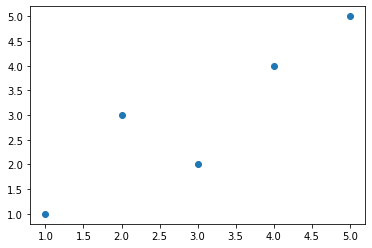

In [62]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

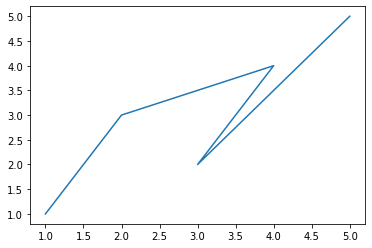

In [63]:
plt.plot(x, y)
plt.show